In [99]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.6 MB/s eta 0:00:000m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 9.5 MB/s eta 0:00:000m eta 0:00:010:00:01


In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/'

In [26]:
df = pd.read_csv(DATA_DIR + 'customer_segmentaion.csv', encoding='unicode_escape', parse_dates=['InvoiceDate'])

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [66]:
df[df.duplicated(keep=False)].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13,0.55,17838.0,United Kingdom
529981,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06,2.95,14562.0,United Kingdom


In [64]:
df[(df['Description'] == 'UNION JACK FLAG LUGGAGE TAG') & (df['CustomerID'] == 17908.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01,1.25,17908.0,United Kingdom


In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].dt.date)

In [69]:
df.groupby('CustomerID').count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
CustomerID,,,,,,,
12346.0,2,2,2,2,2,2,2
12347.0,182,182,182,182,182,182,182
12348.0,31,31,31,31,31,31,31
12349.0,73,73,73,73,73,73,73
12350.0,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...
18280.0,10,10,10,10,10,10,10
18281.0,7,7,7,7,7,7,7
18282.0,13,13,13,13,13,13,13


In [70]:
df.groupby('InvoiceNo')['CustomerID'].apply(list)

InvoiceNo
536365     [17850.0, 17850.0, 17850.0, 17850.0, 17850.0, ...
536366                                    [17850.0, 17850.0]
536367     [13047.0, 13047.0, 13047.0, 13047.0, 13047.0, ...
536368                  [13047.0, 13047.0, 13047.0, 13047.0]
536369                                             [13047.0]
                                 ...                        
C581484                                            [16446.0]
C581490                                   [14397.0, 14397.0]
C581499                                            [15498.0]
C581568                                            [15311.0]
C581569                                   [17315.0, 17315.0]
Name: CustomerID, Length: 25900, dtype: object

In [83]:
temp = df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: stats.mode(x)[0][0])

In [84]:
temp.isna().sum()

135037

In [85]:
df['CustomerID'].fillna(temp, inplace=True)

In [86]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [87]:
df.dropna(subset=['CustomerID'],inplace=True)

In [88]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [89]:
df.shape

(401603, 8)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401603 non-null  object        
 1   StockCode    401603 non-null  object        
 2   Description  401603 non-null  object        
 3   Quantity     401603 non-null  int64         
 4   InvoiceDate  401603 non-null  datetime64[ns]
 5   UnitPrice    401603 non-null  float64       
 6   CustomerID   401603 non-null  float64       
 7   Country      401603 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [91]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
170506,551305,21096,SET/6 FRUIT SALAD PAPER PLATES,24,2011-04-27,0.39,16145.0,United Kingdom
154857,549951,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-04-13,2.95,13134.0,United Kingdom
333075,566171,22457,NATURAL SLATE HEART CHALKBOARD,1,2011-09-09,2.95,18118.0,United Kingdom


In [92]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [93]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

In [94]:
temp

Empty DataFrame
Columns: []
Index: [(12346.0, 541431, United Kingdom), (12346.0, C541433, United Kingdom), (12347.0, 537626, Iceland), (12347.0, 542237, Iceland), (12347.0, 549222, Iceland), (12347.0, 556201, Iceland), (12347.0, 562032, Iceland), (12347.0, 573511, Iceland), (12347.0, 581180, Iceland), (12348.0, 539318, Finland), (12348.0, 541998, Finland), (12348.0, 548955, Finland), (12348.0, 568172, Finland), (12349.0, 577609, Italy), (12350.0, 543037, Norway), (12352.0, 544156, Norway), (12352.0, 545323, Norway), (12352.0, 545332, Norway), (12352.0, 546869, Norway), (12352.0, 547390, Norway), (12352.0, 567505, Norway), (12352.0, 568699, Norway), (12352.0, 574275, Norway), (12352.0, C545329, Norway), (12352.0, C545330, Norway), (12352.0, C547388, Norway), (12353.0, 553900, Bahrain), (12354.0, 550911, Spain), (12355.0, 552449, Bahrain), (12356.0, 541430, Portugal), (12356.0, 549435, Portugal), (12356.0, 576895, Portugal), (12357.0, 574740, Switzerland), (12358.0, 559707, Austria), (12358.0, 581232, Austria), (12359.0, 540946, Cyprus), (12359.0, 543370, Cyprus), (12359.0, 555477, Cyprus), (12359.0, 571034, Cyprus), (12359.0, C549955, Cyprus), (12359.0, C580165, Cyprus), (12360.0, 554132, Austria), (12360.0, 563749, Austria), (12360.0, 571705, Austria), (12361.0, 545017, Belgium), (12362.0, 544203, Belgium), (12362.0, 551346, Belgium), (12362.0, 559295, Belgium), (12362.0, 563037, Belgium), (12362.0, 568651, Belgium), (12362.0, 570667, Belgium), (12362.0, 572887, Belgium), (12362.0, 573173, Belgium), (12362.0, 574329, Belgium), (12362.0, 580979, Belgium), (12362.0, C544902, Belgium), (12362.0, C563752, Belgium), (12362.0, C579178, Belgium), (12363.0, 549687, Unspecified), (12363.0, 563947, Unspecified), (12364.0, 563854, Belgium), (12364.0, 567897, Belgium), (12364.0, 573401, Belgium), (12364.0, 580152, Belgium), (12365.0, 544574, Cyprus), (12365.0, 544578, Cyprus), (12365.0, C544577, Cyprus), (12367.0, 580716, Denmark), (12370.0, 538826, Cyprus), (12370.0, 539330, Austria), (12370.0, 546236, Cyprus), (12370.0, 571905, Cyprus), (12371.0, 570521, Switzerland), (12371.0, 572770, Switzerland), (12372.0, 544157, Denmark), (12372.0, 552731, Denmark), (12372.0, 568872, Denmark), (12373.0, 542887, Austria), (12374.0, 576345, Austria), (12375.0, 565333, Finland), (12375.0, 579281, Finland), (12375.0, C581071, Finland), (12377.0, 539488, Switzerland), (12377.0, 542586, Switzerland), (12378.0, 562046, Switzerland), (12379.0, 557789, Belgium), (12379.0, 567196, Belgium), (12379.0, C559193, Belgium), (12380.0, 555739, Belgium), (12380.0, 567928, Belgium), (12380.0, 571187, Belgium), (12380.0, 577180, Belgium), (12380.0, C572532, Belgium), (12381.0, 563100, Norway), (12381.0, 570681, Norway), (12381.0, 570725, Norway), (12381.0, 574694, Norway), (12381.0, 580638, Norway), (12381.0, C565050, Norway), (12383.0, 539840, Belgium), ...]

[22190 rows x 0 columns]

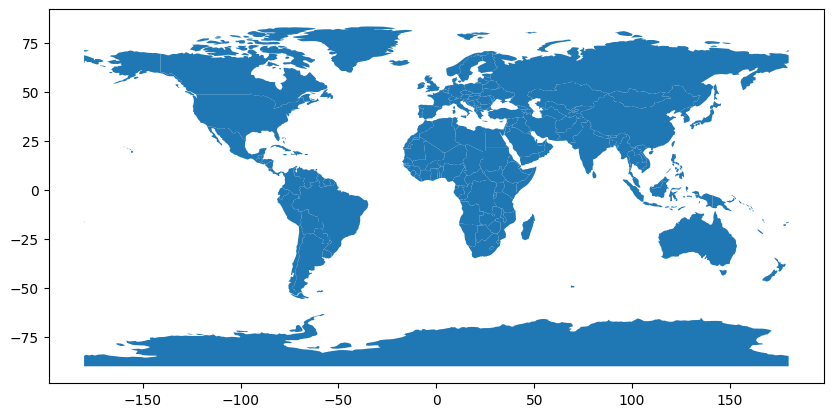

In [108]:
# Load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with aspect ratio set to 'equal'
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, aspect='equal')

# Display the plot
plt.show()

In [129]:
def plot_country_colors(country_name, counter):
    # Load the world shapefile data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filter the world data to include only the specified country
    country = world[world['name'] == country_name]

    # Create a new column in the GeoDataFrame to store the counter values
    country['counter'] = counter

    # Plot the country with colors based on the counter values
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('auto')  # Set aspect ratio explicitly
    country.plot(column='counter', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Set plot title
    plt.title('Counter for ' + country_name)

    # Display the plot
    plt.show()

ValueError: aspect must be finite and positive 

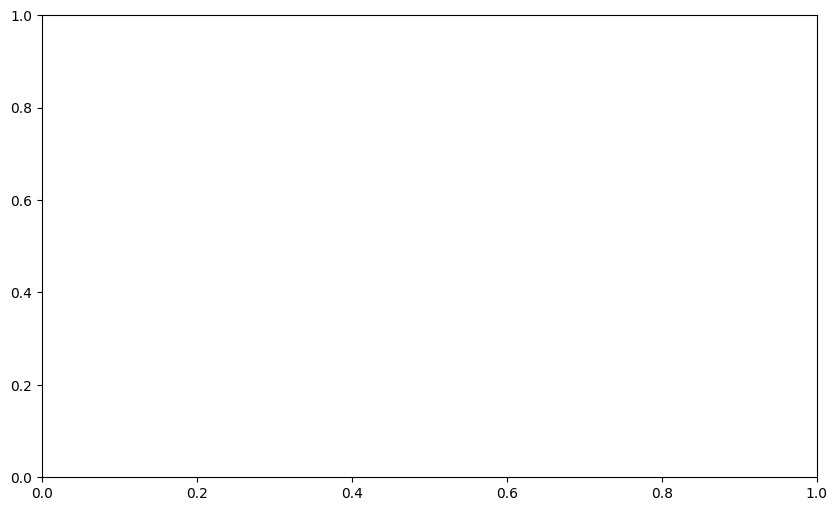

In [130]:
# Sample counter dictionary
counter = {'California': 10, 'Texas': 5, 'New York': 7}

# Plot the colors for the 'United States' based on the counter values
plot_country_colors('United States', counter)

In [114]:
# Build the default map for a specific location
map = folium.Map(location=[43.61092, 3.87723])
map
